<a href="https://colab.research.google.com/github/jcdevaney/imc2023/blob/main/week4/amplitudeModulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pylab as plt
import librosa.display
import IPython.display
import librosa

#import audio files
!git clone https://github.com/jcdevaney/imc2023.git

Cloning into 'imc2023'...
remote: Enumerating objects: 94, done.
remote: Counting objects: 100% (94/94), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 94 (delta 38), reused 14 (delta 1), pack-reused 0
Unpacking objects: 100% (94/94), 8.14 MiB | 3.94 MiB/s, done.


In [2]:
def subplots(plotPos,title,data,time,color,ylabel,xlabel):

    #plot the inputted data into the subplot specified in the list plotPos
    plt.subplot(plotPos[0],plotPos[1],plotPos[2])
    plt.title(title)
    plt.plot(time,data,color)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

In [3]:
def amplitudeModulation(sig,sr,modulatorFreq,modulatorAmp,modIndex):
    
    # create a time series from 0 to 1 the length of the inputted sig
    timeSeries = np.linspace(0, 1, len(sig))
    #create a cosine wave modulator with the time series using the inputted modulation frequency 
    #with the np.cos function and multiple it by the inputted modulation amplitude
    modulator = modulatorAmp * np.cos (2 * np.pi * modulatorFreq * timeSeries)
    #perform amplitude modulation by multiplying the inputted sig with the modulator 
    #(multiplied by 1 + modulation index)
    amMod = (1 + modIndex * modulator) * sig
    
    #create a time series to represent time for plotting
    time=np.arange(0,sig.shape[0])/sr
    
    #plot the modulator, the carrier (sig), and the result of the amplitude modulation (amMod)
    subplots([3,1,1],'Modulator signal',modulator,time,'g','Amplitude','Time')
    subplots([3,1,2],'Original (carrier) signal',sig,time,'r','Amplitude','Time')
    subplots([3,1,3],'Amplitude Modulated Signal',amMod,time,'purple','Amplitude','Time')
    
    plt.subplots_adjust(hspace=1)
    plt.rc('font', size=15)
    fig = plt.gcf()
    fig.set_size_inches(16, 9)
    
    return amMod

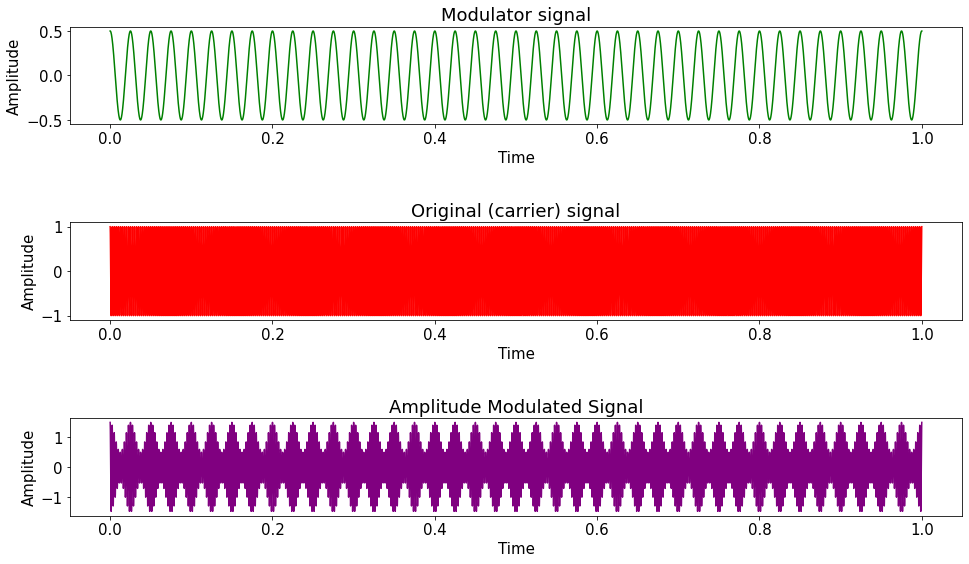

In [6]:
# Amplitude Modulation on a sine wave
sr = 44100
timeSeries = np.linspace(0, 1, sr)
carrier = np.cos(2*np.pi*400*timeSeries)
modSignal2=amplitudeModulation(carrier,sr,40,0.5,1)
IPython.display.Audio(data=modSignal2, rate=44100)

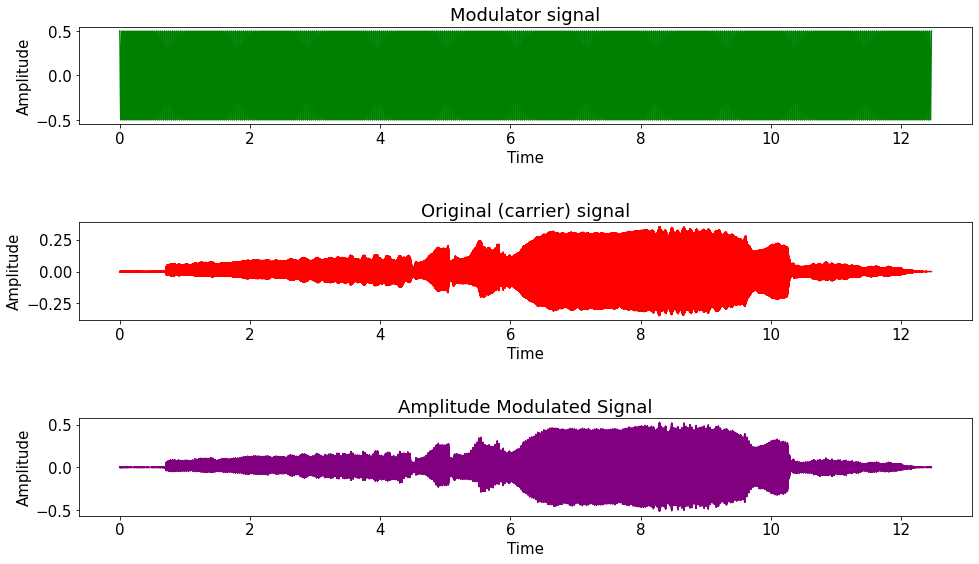

In [10]:
# Amplitude Modulation on a full signal
sig , sr = librosa.load('imc2023/audioFiles/avm.wav')
modSignal=amplitudeModulation(sig,sr,400,0.5,1)
IPython.display.Audio(data=modSignal, rate=sr)

In [11]:
import soundfile as sf

sf.write('sound_file.wav', modSignal, sr, subtype='PCM_24')